In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import openpyxl
from pandas import DataFrame
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import sys
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm

import statsmodels.formula.api as smf
import scipy.stats as scs
from scipy.optimize import minimize

import matplotlib.pyplot as plt
from sklearn.metrics import r2_score 

In [2]:
from statsmodels.discrete.discrete_model import Logit
from statsmodels.discrete.discrete_model import Probit

In [3]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTEN
from imblearn.over_sampling import SMOTENC
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours

In [4]:
ota  = pd.read_excel(
    'spd_others_new_new1.xlsx')
ota.head()

,Unnamed: 0,upload_date,date_begin,inn,account_id,macro_segment,segment,segment_2,business_type,mrf_service_id,...,cmrcl_expn,admn_expn,profit_from_sales,intrst_rcv,intrst_pbl,othr_incm,def_tax_ast,rcvb,load_dttm,src_id
0,0,2021-10-14,2020-07-01,7806460052,654000155089,B2B,3К,ТОП,b2b,16,...,949490000.0,NaN,347295000.0,1973000.0,8336000.0,573020000.0,1929000.0,1.554150e+08,2021-10-07 02:29:45.479,221
1,1,2021-10-14,2019-03-01,5250056647,278000204373,B2B,3К,ТОП,b2b,12,...,NaN,2.304695e+09,422336000.0,9351000.0,404573000.0,261984000.0,NaN,3.236164e+09,2021-10-07 02:29:45.479,221
2,6,2021-10-14,2019-03-01,5517010163,833000092255,B2B,МСП,Средний,b2b,11,...,68051000.0,NaN,-23452000.0,348000.0,NaN,53123000.0,NaN,3.668000e+06,2021-10-07 02:29:45.479,221
3,10,2021-10-14,2020-12-01,3812157949,638000146163,B2B,МСП,Малый,b2b,16,...,6186000.0,NaN,581000.0,NaN,NaN,NaN,NaN,1.150000e+05,2021-10-07 02:29:45.479,221
4,11,2021-10-14,2019-08-01,2635211336,426010153434,B2B,МСП,Микро,b2b,14,...,NaN,NaN,627000.0,NaN,NaN,127000.0,NaN,4.290000e+05,2021-10-07 02:29:45.479,221


### баланс классов

In [7]:
ota.fl_fpd3.value_counts()

0    39585
1     2464
Name: fl_fpd3, dtype: int64

In [8]:
ota[(ota['tot_psv']>9500) & (ota['tot_psv']< 10500) & (ota['crn_ast']>9500) & (ota['crn_ast']<10500)].fl_fpd3.value_counts()[1] / (ota[(ota['tot_psv']>9500) & (ota['tot_psv']< 10500) & (ota['crn_ast']>9500) & (ota['crn_ast']<10500)].fl_fpd3.value_counts()[1]+ ota[(ota['tot_psv']>9500) & (ota['tot_psv']< 10500) & (ota['crn_ast']>9500) & (ota['crn_ast']<10500)].fl_fpd3.value_counts()[0])

0.10433070866141732

In [9]:
ota[(ota['tot_psv']>=10000) & (ota['tot_psv']< 10500) & (ota['crn_ast']>=10000) & (ota['crn_ast']<10500)].spark_registries.value_counts()

0.0    411
1.0     96
Name: spark_registries, dtype: int64

In [10]:
df = ota.isna().sum()
df = pd.DataFrame(df, columns = ['count'])

In [22]:
ota_copy = ota.copy()

In [12]:
len(ota)

42049

In [13]:
df[df['count'] > 23000].index

Index(['inn_old', 'risk_indicator', 'paymentindex', 'cash_assets',
       'intang_ast', 'longterm_fnc_ivsm', 'othr_non_crn_ast', 'vat_prch_val',
       'shortterm_fnc_ivsm', 'addl_cptl', 'rsrv_cptl', 'longterm_brw_fnd',
       'othr_longterm_lby', 'longterm_lby', 'shortterm_brw_fnd', 'def_tax_lby',
       'cmrcl_expn', 'admn_expn', 'intrst_rcv', 'intrst_pbl', 'def_tax_ast'],
      dtype='object')

In [17]:
ota_copy.columns[:50]

Index(['Unnamed: 0', 'upload_date', 'date_begin', 'inn', 'account_id',
       'macro_segment', 'segment', 'segment_2', 'business_type',
       'mrf_service_id', 'mrf_name', 'rf_service_id', 'rf_name', 'device_ind',
       'product', 'diff_date', 'all_rev_sum', 'all_rev_sum_1', 'all_rev_sum_2',
       'all_rev_sum_3', 'all_rev_sum_4', 'all_rev_sum_5', 'all_rev_sum_6',
       'all_rev_sum_7', 'all_rev_sum_8', 'all_rev_sum_9', 'all_rev_sum_10',
       'all_rev_sum_11', 'all_rev_sum_12', 'pay_sum', 'pay_sum_1', 'pay_sum_2',
       'pay_sum_3', 'pay_sum_4', 'pay_sum_5', 'pay_sum_6', 'pay_sum_7',
       'pay_sum_8', 'pay_sum_9', 'pay_sum_10', 'pay_sum_11', 'pay_sum_12',
       'debt_sum_1', 'debt_sum_2', 'debt_sum_3', 'debt_sum_4', 'debt_sum_5',
       'debt_sum_6', 'debt_sum_7', 'debt_sum_8'],
      dtype='object')

### удалил бесполезные регрессоры апостериорные и по которым нету информации

In [23]:
ota_copy = ota_copy.drop(columns = ['all_rev_sum', 'all_rev_sum_1',
       'all_rev_sum_2', 'all_rev_sum_3', 'all_rev_sum_4', 'all_rev_sum_5',
       'all_rev_sum_6', 'all_rev_sum_7', 'all_rev_sum_8', 'all_rev_sum_9',
       'all_rev_sum_10', 'all_rev_sum_11', 'all_rev_sum_12', 'pay_sum',
       'pay_sum_1', 'pay_sum_2', 'pay_sum_3', 'pay_sum_4', 'pay_sum_5',
       'pay_sum_6', 'pay_sum_7', 'pay_sum_8', 'pay_sum_9', 'pay_sum_10',
       'pay_sum_11', 'debt_sum_1', 'debt_sum_2', 'debt_sum_3',
       'debt_sum_4', 'debt_sum_5', 'debt_sum_6', 'debt_sum_7', 'debt_sum_8',
       'debt_sum_9', 'debt_sum_10', 'debt_sum_11', 'debt_sum_12', 'debt_bad_sum_1', 'debt_bad_sum_2', 'debt_bad_sum_3', 'debt_bad_sum_4',
       'debt_bad_sum_5', 'debt_bad_sum_6', 'debt_bad_sum_7', 'debt_bad_sum_8',
       'debt_bad_sum_9', 'debt_bad_sum_10', 'debt_bad_sum_11',
       'debt_bad_sum_12', 'fl_fpd1', 'fl_fpd2', 'fl_fpd6',
       'fl_fpd9', 'fl_fpd12',  'diff_date', 'inn_old', 'cash_assets', 'intang_ast', 'othr_non_crn_ast', 'Unnamed: 0', 'upload_date',
       'rsrv_cptl'])

In [29]:
def isNaN(num):
    return num!= num

In [25]:
ota_copy.columns

Index(['date_begin', 'inn', 'account_id', 'macro_segment', 'segment',
       'segment_2', 'business_type', 'mrf_service_id', 'mrf_name',
       'rf_service_id', 'rf_name', 'device_ind', 'product', 'pay_sum_12',
       'fl_fpd3', 'period', 'sparkid', 'periodname', 'kpp', 'ogrn', 'normname',
       'address', 'director_inn', 'okato_regionname', 'okato_regioncode',
       'okved_code', 'industry', 'company_age', 'legal_form', 'ownership_form',
       'risk_indicator', 'consolidatedindicator', 'indexofduediligence',
       'failurescore', 'paymentindex', 'spark_registries', 'fix_ast',
       'longterm_fnc_ivsm', 'non_crn_ast', 'rsrv', 'vat_prch_val',
       'shortterm_fnc_ivsm', 'cash_and_eqv', 'crn_ast', 'tot_ast', 'ahr_cptl',
       'addl_cptl', 'rtnd_erng', 'cptl_and_rsrv', 'longterm_brw_fnd',
       'othr_longterm_lby', 'longterm_lby', 'shortterm_brw_fnd', 'crdr_dbt',
       'shortterm_lby', 'tot_psv', 'revenue', 'othr_expn', 'pft_bfr_tax',
       'crn_incm_tax', 'def_tax_lby', 'net_pr

### предполагаемый набор фичей по непрерывным регрессорам

In [26]:
features = ['company_age', 'risk_indicator', 'indexofduediligence',
       'failurescore', 'paymentindex', 'fix_ast',
       'longterm_fnc_ivsm', 'non_crn_ast', 'rsrv', 'vat_prch_val',
       'shortterm_fnc_ivsm', 'cash_and_eqv', 'crn_ast', 'tot_ast', 'ahr_cptl',
       'addl_cptl', 'rtnd_erng', 'cptl_and_rsrv', 'longterm_brw_fnd',
       'othr_longterm_lby', 'longterm_lby', 'shortterm_brw_fnd', 'crdr_dbt', 'shortterm_lby',
       'tot_psv', 'revenue', 'othr_expn', 'pft_bfr_tax', 'crn_incm_tax',
       'def_tax_lby', 'net_profit', 'cogs', 'grs_profit', 'cmrcl_expn',
       'admn_expn', 'profit_from_sales', 'intrst_rcv', 'intrst_pbl',
       'othr_incm', 'def_tax_ast', 'rcvb']

In [37]:
ota_copy1 = ota_copy.copy()

### здесь я удаляю пустые наблюдения, больше 10 пропусков по присутсвуюшим фичам выше

In [38]:
drop = []
for j in range(ota_copy1.index[0], ota_copy1.index[len(ota_copy1)-1]):
    ind = 0
    for i in features:
        if isNaN(ota_copy1[i].loc[j]):
            ind +=1
    if ind > 10:
        drop.append(j)
        
        

In [39]:
len(drop)

35258

In [40]:
ota_copy1 = ota_copy1.drop(drop)

In [41]:
ota_copy1.fl_fpd3.value_counts()

0    6308
1     483
Name: fl_fpd3, dtype: int64

In [42]:
ota_copy2 = ota_copy1.copy()

In [43]:
ota_copy2[features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6791 entries, 0 to 42048
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company_age          6791 non-null   int64  
 1   risk_indicator       2734 non-null   float64
 2   indexofduediligence  6752 non-null   float64
 3   failurescore         6705 non-null   float64
 4   paymentindex         2734 non-null   float64
 5   fix_ast              6716 non-null   float64
 6   longterm_fnc_ivsm    1926 non-null   float64
 7   non_crn_ast          6781 non-null   float64
 8   rsrv                 6706 non-null   float64
 9   vat_prch_val         5043 non-null   float64
 10  shortterm_fnc_ivsm   3712 non-null   float64
 11  cash_and_eqv         6749 non-null   float64
 12  crn_ast              6791 non-null   float64
 13  tot_ast              6791 non-null   float64
 14  ahr_cptl             6766 non-null   float64
 15  addl_cptl            1410 non-null   

### перевел некоторые регр в флоты

In [24]:
ota_copy2["fix_ast"] = pd.to_numeric(ota_copy2["fix_ast"])
ota_copy2["rtnd_erng"] = pd.to_numeric(ota_copy2["rtnd_erng"])
ota_copy2["othr_expn"] = pd.to_numeric(ota_copy2["othr_expn"])
ota_copy2["pft_bfr_tax"] = pd.to_numeric(ota_copy2["pft_bfr_tax"])
ota_copy2["def_tax_lby"] = pd.to_numeric(ota_copy2["def_tax_lby"])
ota_copy2["othr_incm"] = pd.to_numeric(ota_copy2["othr_incm"])
ota_copy2["def_tax_ast"] = pd.to_numeric(ota_copy2["def_tax_ast"])

### заполнил медианами

In [44]:
ota_copy2[features] = ota_copy2[features].fillna(ota_copy2[features].median())

In [45]:
ota_copy2.spark_registries.value_counts()

0.0    5258
1.0     492
Name: spark_registries, dtype: int64

## далее процесс добавления бинарок в фрейм по присутствующим переменным

### добавление мрфов

In [46]:
mrf = DataFrame(ota_copy2.mrf_name)
mrf = pd.get_dummies(mrf)

In [47]:
ota_copy3 = pd.concat([ota_copy2, mrf], axis = 1)

### добавление показателя консолидации

In [48]:
ota_copy3.consolidatedindicator.value_counts()

Low       4479
Medium    1401
High       872
Name: consolidatedindicator, dtype: int64

In [49]:
consol = pd.get_dummies(ota_copy3.consolidatedindicator, dummy_na = True, columns = ['High', 'Low', 'Medium', 'No inf']).values
consol = pd.DataFrame(consol, columns = ['High', 'Low', 'Medium', 'No inf'] )
consol = consol.set_index(ota_copy3.index)

In [50]:
ota_copy4 = pd.concat([ota_copy3, consol], axis = 1)

In [52]:
ota_copy5 = ota_copy4.copy()

### добавление размера сегмента

In [51]:
level = pd.get_dummies(ota_copy4.segment_level3_new)
level = pd.DataFrame(level)
level = level.set_index(ota_copy3.index)

AttributeError: 'DataFrame' object has no attribute 'segment_level3_new'

In [33]:
ota_copy5 = pd.concat([ota_copy4, level], axis = 1)

### добавление скора спарка в том числе и на отсутствие информации

In [53]:
spark_des = pd.get_dummies(ota_copy5.spark_registries, dummy_na = True).values
spark_des = pd.DataFrame(spark_des, columns = ['Good spark', 'Bad spark', 'No inf spark'])
spark_des = spark_des.set_index(ota_copy3.index)

In [54]:
ota_copy6 = pd.concat([ota_copy5, spark_des], axis = 1)

In [68]:
ota_total = ota_copy6.copy()

### добавление 30 наиболее распространенных полей деятельности фирм

In [69]:
industry = pd.get_dummies(ota_total.industry)
industry = pd.DataFrame(industry, columns = pd.DataFrame(pd.get_dummies(ota_total.industry).sum().sort_values(ascending = False)[1:30]).index)
industry = industry.set_index(ota_total.index)

In [70]:
ota_total = pd.concat([ota_total, industry], axis = 1)

### удаление оставшихся колонок - временных меток и уже ненужных текстовых переменных

In [71]:
ota_total = ota_total.drop(columns = ['account_id',
       'mrf_service_id', 'mrf_name', 'rf_service_id', 'rf_name',
       'device_ind', 'product', 'period',
       'sparkid', 'periodname', 'kpp', 'ogrn', 'normname', 'address',
       'director_inn', 'okato_regionname', 'okato_regioncode', 'okved_code', 'load_dttm', 'src_id', 'spark_registries','industry', 'consolidatedindicator', 'macro_segment', 'segment', 'segment_2',
       'business_type', 'pay_sum_12'            ])

### добавление некоторых бинарных на тип владения и форма собственности 

In [73]:
def industry(cam_60_total):
    
  
    a = np.random.randint(low = 0, high=1, size= len(cam_60_total), dtype='l')
    cam_60_total['OOO'] = a
    cam_60_total['НАО'] = a
    cam_60_total['ПАО'] = a
    cam_60_total['Privat'] = a
    cam_60_total['Zabugorie'] = a
    cam_60_total['Zabugorie+Privat'] = a
    
    
    
    for i in range(0,len(cam_60_total)):
        
        if cam_60_total['legal_form'].iloc[i] == 'Общества с ограниченной ответственностью':
            cam_60_total['OOO'].iloc[i] = 1
        if cam_60_total['legal_form'].iloc[i] == 'Непубличные акционерные общества':
            cam_60_total['НАО'].iloc[i] = 1
        if cam_60_total['legal_form'].iloc[i] == 'Публичные акционерные общества':
            cam_60_total['ПАО'].iloc[i] = 1
        if cam_60_total['ownership_form'].iloc[i] == 'Частная собственность':
            cam_60_total['Privat'].iloc[i] = 1
        if cam_60_total['ownership_form'].iloc[i] == 'Собственность иностранных юридических лиц':
            cam_60_total['Zabugorie'].iloc[i] = 1
        if cam_60_total['ownership_form'].iloc[i] == 'Совместная частная и иностранная собственность':
            cam_60_total['Zabugorie+Privat'].iloc[i] = 1
    return cam_60_total

    

In [74]:
ota_total = industry(ota_total)

### исключние текстовых

In [75]:
ota_total = ota_total.drop(columns = ['ownership_form', 'legal_form'])

In [156]:
y = ota_total.fl_fpd3
X = ota_total.drop(columns = ['fl_fpd3'])

### Тест - трейн разделение

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
X_train = X_train.drop(columns = 'date_begin')

### пересемплирование на основе категорианльных фичей, можно использовать еще smoteen из combine, но он не учитывает бинарки, но может давать лучшие результаты

In [79]:
smeen = SMOTENC(random_state=1, categorical_features=[i for i in range(41,len(X.columns)-1)])
X_train_res, y_train_res = smeen.fit_resample(X_train, y_train)

In [80]:
smteen = SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='majority'))

In [81]:
X_train_res_under, y_train_res_under = smteen.fit_resample(X_train, y_train)

In [82]:
y_train_res.value_counts()

1    5054
0    5054
Name: fl_fpd3, dtype: int64

In [85]:
X_train_res.columns

Index(['inn', 'company_age', 'risk_indicator', 'indexofduediligence',
       'failurescore', 'paymentindex', 'fix_ast', 'longterm_fnc_ivsm',
       'non_crn_ast', 'rsrv', 'vat_prch_val', 'shortterm_fnc_ivsm',
       'cash_and_eqv', 'crn_ast', 'tot_ast', 'ahr_cptl', 'addl_cptl',
       'rtnd_erng', 'cptl_and_rsrv', 'longterm_brw_fnd', 'othr_longterm_lby',
       'longterm_lby', 'shortterm_brw_fnd', 'crdr_dbt', 'shortterm_lby',
       'tot_psv', 'revenue', 'othr_expn', 'pft_bfr_tax', 'crn_incm_tax',
       'def_tax_lby', 'net_profit', 'cogs', 'grs_profit', 'cmrcl_expn',
       'admn_expn', 'profit_from_sales', 'intrst_rcv', 'intrst_pbl',
       'othr_incm', 'def_tax_ast', 'rcvb', 'mrf_name_Волга',
       'mrf_name_Дальний Восток', 'mrf_name_Прочие', 'mrf_name_Северо-Запад',
       'mrf_name_Сибирь', 'mrf_name_Урал', 'mrf_name_Центр', 'mrf_name_Юг',
       'High', 'Low', 'Medium', 'No inf', 'Good spark', 'Bad spark',
       'No inf spark',
       'Торговля розничная лекарственными средств

### не дамми из фичей

In [83]:
X_non_dummy = X_train_res[['company_age', 'risk_indicator', 'indexofduediligence', 'failurescore',
       'paymentindex', 'fix_ast', 'longterm_fnc_ivsm', 'non_crn_ast', 'rsrv',
       'vat_prch_val', 'shortterm_fnc_ivsm', 'cash_and_eqv', 'crn_ast',
       'tot_ast', 'ahr_cptl', 'addl_cptl', 'rtnd_erng', 'cptl_and_rsrv',
       'longterm_brw_fnd', 'othr_longterm_lby', 'longterm_lby',
       'shortterm_brw_fnd', 'crdr_dbt', 'shortterm_lby', 'tot_psv', 'revenue',
       'othr_expn', 'pft_bfr_tax', 'crn_incm_tax', 'def_tax_lby', 'net_profit',
       'cogs', 'grs_profit', 'cmrcl_expn', 'admn_expn', 'profit_from_sales',
       'intrst_rcv', 'intrst_pbl', 'othr_incm', 'def_tax_ast', 'rcvb']]

In [158]:
X_non_dummy_test = X_test[['company_age', 'risk_indicator', 'indexofduediligence', 'failurescore',
       'paymentindex', 'fix_ast', 'longterm_fnc_ivsm', 'non_crn_ast', 'rsrv',
       'vat_prch_val', 'shortterm_fnc_ivsm', 'cash_and_eqv', 'crn_ast',
       'tot_ast', 'ahr_cptl', 'addl_cptl', 'rtnd_erng', 'cptl_and_rsrv',
       'longterm_brw_fnd', 'othr_longterm_lby', 'longterm_lby',
       'shortterm_brw_fnd', 'crdr_dbt', 'shortterm_lby', 'tot_psv', 'revenue',
       'othr_expn', 'pft_bfr_tax', 'crn_incm_tax', 'def_tax_lby', 'net_profit',
       'cogs', 'grs_profit', 'cmrcl_expn', 'admn_expn', 'profit_from_sales',
       'intrst_rcv', 'intrst_pbl', 'othr_incm', 'def_tax_ast', 'rcvb']]

### дамми из фичей

In [86]:
X_dummy = X_train_res[['mrf_name_Волга',
       'mrf_name_Дальний Восток', 'mrf_name_Прочие', 'mrf_name_Северо-Запад',
       'mrf_name_Сибирь', 'mrf_name_Урал', 'mrf_name_Центр', 'mrf_name_Юг',
       'High', 'Low', 'Medium', 'No inf', 'Good spark', 'Bad spark',
       'No inf spark',
       'Торговля розничная лекарственными средствами в специализированных магазинах (аптеках)',
       'Торговля оптовая неспециализированная', 'Выращивание зерновых культур',
       'Строительство автомобильных дорог и автомагистралей',
       'Аренда и управление собственным или арендованным недвижимым имуществом',
       'Аренда и управление собственным или арендованным нежилым недвижимым имуществом',
       'Выращивание зерновых (кроме риса), зернобобовых культур и семян масличных культур',
       'Торговля оптовая фармацевтической продукцией',
       'Разработка компьютерного программного обеспечения',
       'Торговля оптовая лесоматериалами, строительными материалами и санитарно-техническим оборудованием',
       'Деятельность вспомогательная прочая, связанная с перевозками',
       'Торговля розничная прочая в неспециализированных магазинах',
       'Деятельность автомобильного грузового транспорта',
       'Торговля оптовая твердым, жидким и газообразным топливом и подобными продуктами',
       'Торговля розничная преимущественно пищевыми продуктами, включая напитки, и табачными изделиями в неспециализированных магазинах',
       'Торговля розничная легковыми автомобилями и легкими автотранспортными средствами в специализированных магазинах',
       'Разведение молочного крупного рогатого скота, производство сырого молока',
       'Деятельность ресторанов и услуги по доставке продуктов питания',
       'Производство электромонтажных работ',
       'Передача электроэнергии и технологическое присоединение к распределительным электросетям',
       'Торговля оптовая прочими машинами и оборудованием',
       'Консультирование по вопросам коммерческой деятельности и управления',
       'Торговля оптовая автомобильными деталями, узлами и принадлежностями, кроме деятельности агентов',
       'Деятельность по финансовой аренде (лизингу/сублизингу)',
       'Научные исследования и разработки в области естественных и технических наук прочие',
       'Торговля оптовая машинами, оборудованием и инструментами для сельского хозяйства',
       'Деятельность заказчика-застройщика, генерального подрядчика',
       'Торговля оптовая производственным электротехническим оборудованием, машинами, аппаратурой и материалами',
       'Выращивание однолетних культур', 'OOO', 'НАО', 'ПАО', 'Privat',
       'Zabugorie', 'Zabugorie+Privat']]

In [159]:
X_dummy_test = X_test[['mrf_name_Волга',
       'mrf_name_Дальний Восток', 'mrf_name_Прочие', 'mrf_name_Северо-Запад',
       'mrf_name_Сибирь', 'mrf_name_Урал', 'mrf_name_Центр', 'mrf_name_Юг',
       'High', 'Low', 'Medium', 'No inf', 'Good spark', 'Bad spark',
       'No inf spark',
       'Торговля розничная лекарственными средствами в специализированных магазинах (аптеках)',
       'Торговля оптовая неспециализированная', 'Выращивание зерновых культур',
       'Строительство автомобильных дорог и автомагистралей',
       'Аренда и управление собственным или арендованным недвижимым имуществом',
       'Аренда и управление собственным или арендованным нежилым недвижимым имуществом',
       'Выращивание зерновых (кроме риса), зернобобовых культур и семян масличных культур',
       'Торговля оптовая фармацевтической продукцией',
       'Разработка компьютерного программного обеспечения',
       'Торговля оптовая лесоматериалами, строительными материалами и санитарно-техническим оборудованием',
       'Деятельность вспомогательная прочая, связанная с перевозками',
       'Торговля розничная прочая в неспециализированных магазинах',
       'Деятельность автомобильного грузового транспорта',
       'Торговля оптовая твердым, жидким и газообразным топливом и подобными продуктами',
       'Торговля розничная преимущественно пищевыми продуктами, включая напитки, и табачными изделиями в неспециализированных магазинах',
       'Торговля розничная легковыми автомобилями и легкими автотранспортными средствами в специализированных магазинах',
       'Разведение молочного крупного рогатого скота, производство сырого молока',
       'Деятельность ресторанов и услуги по доставке продуктов питания',
       'Производство электромонтажных работ',
       'Передача электроэнергии и технологическое присоединение к распределительным электросетям',
       'Торговля оптовая прочими машинами и оборудованием',
       'Консультирование по вопросам коммерческой деятельности и управления',
       'Торговля оптовая автомобильными деталями, узлами и принадлежностями, кроме деятельности агентов',
       'Деятельность по финансовой аренде (лизингу/сублизингу)',
       'Научные исследования и разработки в области естественных и технических наук прочие',
       'Торговля оптовая машинами, оборудованием и инструментами для сельского хозяйства',
       'Деятельность заказчика-застройщика, генерального подрядчика',
       'Торговля оптовая производственным электротехническим оборудованием, машинами, аппаратурой и материалами',
       'Выращивание однолетних культур', 'OOO', 'НАО', 'ПАО', 'Privat',
       'Zabugorie', 'Zabugorie+Privat']]

### Нормализуем непрерывные

In [87]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_std = stdsc.fit_transform(X_non_dummy)

In [160]:
X_std_test = stdsc.transform(X_non_dummy_test)

### объединяем дамми и непрерывные норм

In [88]:
Norm = pd.DataFrame(X_std, columns = X_non_dummy.columns)
Norm = Norm.set_index(X_train_res.index)

In [89]:
Norm_dummy = pd.concat([Norm, X_dummy], axis = 1)

In [162]:
Norm_test = pd.DataFrame(X_std_test, columns = X_non_dummy_test.columns)
Norm_test = Norm_test.set_index(X_test.index)
Norm_dummy_test = pd.concat([Norm_test, X_dummy_test], axis = 1)

In [90]:
feat_labels = X_train_res.columns

In [91]:
feat_all = Norm_dummy.columns

In [92]:
plt.rcParams["figure.figsize"] = (20, 10)

### отбор фичей на основе рфц

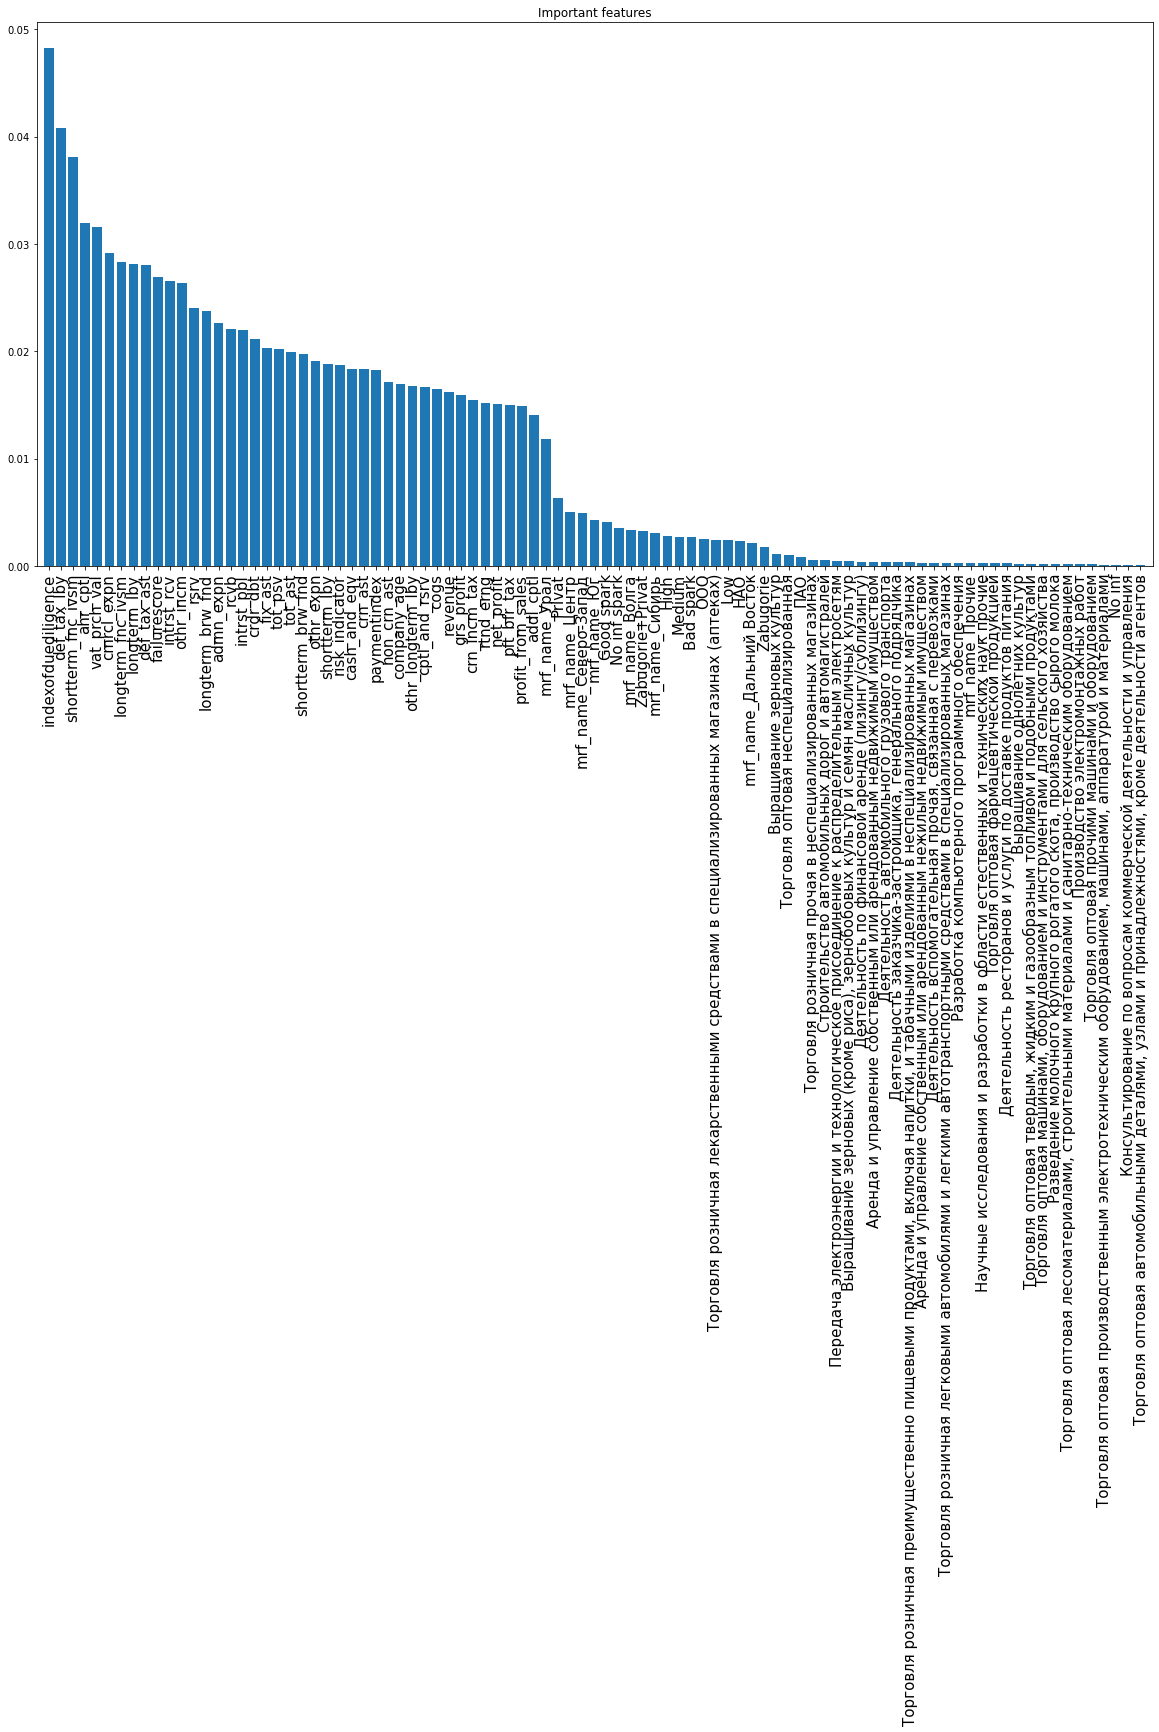

In [93]:
forest = RandomForestClassifier(n_estimators = 1000, random_state = 42)
forest.fit(Norm_dummy, y_train_res)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
srt_feat = [feat_all[b] for i, b in enumerate(indices)]
srt_imp = [importances[b] for i, b in enumerate(indices)]
plt.title('Important features')
plt.bar(range(Norm_dummy.shape[1]),srt_imp, align = 'center')
plt.xticks(range(Norm_dummy.shape[1]), srt_feat, rotation = 90, fontsize = 15)
plt.xlim([-1, Norm_dummy.shape[1]])
plt.tight_layout()
plt.show()

In [94]:
srt_feat

['indexofduediligence',
 'def_tax_lby',
 'shortterm_fnc_ivsm',
 'ahr_cptl',
 'vat_prch_val',
 'cmrcl_expn',
 'longterm_fnc_ivsm',
 'longterm_lby',
 'def_tax_ast',
 'failurescore',
 'intrst_rcv',
 'othr_incm',
 'rsrv',
 'longterm_brw_fnd',
 'admn_expn',
 'rcvb',
 'intrst_pbl',
 'crdr_dbt',
 'fix_ast',
 'tot_psv',
 'tot_ast',
 'shortterm_brw_fnd',
 'othr_expn',
 'shortterm_lby',
 'risk_indicator',
 'cash_and_eqv',
 'crn_ast',
 'paymentindex',
 'non_crn_ast',
 'company_age',
 'othr_longterm_lby',
 'cptl_and_rsrv',
 'cogs',
 'revenue',
 'grs_profit',
 'crn_incm_tax',
 'rtnd_erng',
 'net_profit',
 'pft_bfr_tax',
 'profit_from_sales',
 'addl_cptl',
 'mrf_name_Урал',
 'Privat',
 'mrf_name_Центр',
 'mrf_name_Северо-Запад',
 'mrf_name_Юг',
 'Good spark',
 'No inf spark',
 'mrf_name_Волга',
 'Zabugorie+Privat',
 'mrf_name_Сибирь',
 'High',
 'Medium',
 'Bad spark',
 'OOO',
 'Торговля розничная лекарственными средствами в специализированных магазинах (аптеках)',
 'Low',
 'НАО',
 'mrf_name_Дальний 

In [163]:
X_log_test = Norm_dummy_test[[
 'def_tax_lby',
 'ahr_cptl',
 'cmrcl_expn',
 'longterm_fnc_ivsm',
 'longterm_lby',
 'def_tax_ast',
 'failurescore',
 'intrst_rcv',
 'longterm_brw_fnd',
 'admn_expn',
 'rcvb',
 'crdr_dbt',
 'fix_ast',
 'shortterm_brw_fnd',
 'risk_indicator',
 'cash_and_eqv',
 'company_age',
 'othr_longterm_lby',
 'cptl_and_rsrv',
 'cogs',
 'revenue',
 'crn_incm_tax',
 'rtnd_erng',
 'profit_from_sales',
 'addl_cptl',
 'mrf_name_Урал',
 'Privat',
 'mrf_name_Центр',
 'mrf_name_Северо-Запад',
 'mrf_name_Юг',
 'Good spark',
 'No inf spark',
 'mrf_name_Волга',
 'Zabugorie+Privat',
 'mrf_name_Сибирь',
 'OOO',
 'Торговля розничная лекарственными средствами в специализированных магазинах (аптеках)',
 'Low',
 'НАО',
 'mrf_name_Дальний Восток',
 'Выращивание зерновых культур',
 'Торговля оптовая неспециализированная',
 'ПАО',
 'Торговля розничная прочая в неспециализированных магазинах',
 'Строительство автомобильных дорог и автомагистралей',
 'Передача электроэнергии и технологическое присоединение к распределительным электросетям',
 'Выращивание зерновых (кроме риса), зернобобовых культур и семян масличных культур',
 'Деятельность по финансовой аренде (лизингу/сублизингу)',
 'Аренда и управление собственным или арендованным недвижимым имуществом',
 'Деятельность автомобильного грузового транспорта',
 'Деятельность заказчика-застройщика, генерального подрядчика',
 'Торговля розничная преимущественно пищевыми продуктами, включая напитки, и табачными изделиями в неспециализированных магазинах',
 'Аренда и управление собственным или арендованным нежилым недвижимым имуществом',
 'Деятельность вспомогательная прочая, связанная с перевозками',
 'Торговля розничная легковыми автомобилями и легкими автотранспортными средствами в специализированных магазинах',
 'Разработка компьютерного программного обеспечения',
 'Научные исследования и разработки в области естественных и технических наук прочие',
 'Торговля оптовая фармацевтической продукцией',
 'Деятельность ресторанов и услуги по доставке продуктов питания',
 'Выращивание однолетних культур',
 'Торговля оптовая твердым, жидким и газообразным топливом и подобными продуктами',
 'Торговля оптовая машинами, оборудованием и инструментами для сельского хозяйства',
 'Разведение молочного крупного рогатого скота, производство сырого молока',
 'Торговля оптовая лесоматериалами, строительными материалами и санитарно-техническим оборудованием',
 'Производство электромонтажных работ',
 'Торговля оптовая прочими машинами и оборудованием',
 'Торговля оптовая производственным электротехническим оборудованием, машинами, аппаратурой и материалами',
 'No inf',
 'Консультирование по вопросам коммерческой деятельности и управления',
 'Торговля оптовая автомобильными деталями, узлами и принадлежностями, кроме деятельности агентов']]
X_log_test = sm.add_constant(X_log_test)

In [146]:
X_log_train = Norm_dummy[[
 'def_tax_lby',
 'ahr_cptl',
 'cmrcl_expn',
 'longterm_fnc_ivsm',
 'longterm_lby',
 'def_tax_ast',
 'failurescore',
 'intrst_rcv',
 'longterm_brw_fnd',
 'admn_expn',
 'rcvb',
 'crdr_dbt',
 'fix_ast',
 'shortterm_brw_fnd',
 'risk_indicator',
 'cash_and_eqv',
 'company_age',
 'othr_longterm_lby',
 'cptl_and_rsrv',
 'cogs',
 'revenue',
 'crn_incm_tax',
 'rtnd_erng',
 'profit_from_sales',
 'addl_cptl',
 'mrf_name_Урал',
 'Privat',
 'mrf_name_Центр',
 'mrf_name_Северо-Запад',
 'mrf_name_Юг',
 'Good spark',
 'No inf spark',
 'mrf_name_Волга',
 'Zabugorie+Privat',
 'mrf_name_Сибирь',
 'OOO',
 'Торговля розничная лекарственными средствами в специализированных магазинах (аптеках)',
 'Low',
 'НАО',
 'mrf_name_Дальний Восток',
 'Выращивание зерновых культур',
 'Торговля оптовая неспециализированная',
 'ПАО',
 'Торговля розничная прочая в неспециализированных магазинах',
 'Строительство автомобильных дорог и автомагистралей',
 'Передача электроэнергии и технологическое присоединение к распределительным электросетям',
 'Выращивание зерновых (кроме риса), зернобобовых культур и семян масличных культур',
 'Деятельность по финансовой аренде (лизингу/сублизингу)',
 'Аренда и управление собственным или арендованным недвижимым имуществом',
 'Деятельность автомобильного грузового транспорта',
 'Деятельность заказчика-застройщика, генерального подрядчика',
 'Торговля розничная преимущественно пищевыми продуктами, включая напитки, и табачными изделиями в неспециализированных магазинах',
 'Аренда и управление собственным или арендованным нежилым недвижимым имуществом',
 'Деятельность вспомогательная прочая, связанная с перевозками',
 'Торговля розничная легковыми автомобилями и легкими автотранспортными средствами в специализированных магазинах',
 'Разработка компьютерного программного обеспечения',
 'Научные исследования и разработки в области естественных и технических наук прочие',
 'Торговля оптовая фармацевтической продукцией',
 'Деятельность ресторанов и услуги по доставке продуктов питания',
 'Выращивание однолетних культур',
 'Торговля оптовая твердым, жидким и газообразным топливом и подобными продуктами',
 'Торговля оптовая машинами, оборудованием и инструментами для сельского хозяйства',
 'Разведение молочного крупного рогатого скота, производство сырого молока',
 'Торговля оптовая лесоматериалами, строительными материалами и санитарно-техническим оборудованием',
 'Производство электромонтажных работ',
 'Торговля оптовая прочими машинами и оборудованием',
 'Торговля оптовая производственным электротехническим оборудованием, машинами, аппаратурой и материалами',
 'No inf',
 'Консультирование по вопросам коммерческой деятельности и управления',
 'Торговля оптовая автомобильными деталями, узлами и принадлежностями, кроме деятельности агентов']]
X_log_train = sm.add_constant(X_log_train)

In [147]:
logit_model=Logit(y_train_res, X_log_train)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.520637
         Iterations: 35
                                                                                         Results: Logit
Model:                                                         Logit                                                      Pseudo R-squared:                                           0.249     
Dependent Variable:                                            fl_fpd3                                                    AIC:                                                        10667.2006
Date:                                                          2021-10-22 17:36                                           BIC:                                                        11179.8974
No. Observations:                                              10108                                                      Log-Likelihood:                                             -5262.6   
Df Model:                                                 

In [149]:
glm_probit = sm.GLM(y_train_res, X_log_train, family=sm.families.Binomial(link=sm.families.links.probit))


In [150]:
results_probit = glm_probit.fit()
results_probit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                fl_fpd3   No. Observations:                10108
Model:                            GLM   Df Residuals:                    10037
Model Family:                Binomial   Df Model:                           70
Link Function:                 probit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Fri, 22 Oct 2021   Deviance:                       10536.
Time:                        17:37:19   Pearson chi2:                 1.12e+04
No. Iterations:                    40                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================================================================================
                                                                                                                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                                               2.0573      0.167     12.335      0.000       1.730       2.384
def_tax_lby                                                                                                                         2.0317      0.330      6.161      0.000       1.385       2.678
ahr_cptl                                                                                                                            2.5671      0.510      5.036      0.000       1.568       3.566
cmrcl_expn                                                                                                                          5.7883      1.592      3.636      0.000       2.669       8.908
longterm_fnc_ivsm                                                                                                                  -1.0665      0.232     -4.594      0.000      -1.521      -0.611
longterm_lby                                                                                                                        1.5653      0.687      2.278      0.023       0.219       2.912
def_tax_ast                                                                                                                        -0.2338      0.047     -4.970      0.000      -0.326      -0.142
failurescore                                                                                                                        0.0567      0.025      2.286      0.022       0.008       0.105
intrst_rcv                                                                                                                          0.1159      0.052      2.221      0.026       0.014       0.218
longterm_brw_fnd                                                                                                                   -1.2975      0.522     -2.488      0.013      -2.320      -0.275
admn_expn                                                                                                                           1.6397      0.367      4.462      0.000       0.919       2.360
rcvb                                                                                                                               -0.0783      0.042     -1.864      0.062      -0.161       0.004
crdr_dbt                                                                                                                            0.1455     

In [164]:
y_pred = results_probit.predict(X_log_test)

In [165]:
probit_flags = []
for i in range(0, len(y_pred)):
    if y_pred.iloc[i]>=0.4:
        probit_flags.append(1)
    else:
        probit_flags.append(0)

In [166]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, probit_flags)
print(confusion_matrix)

[[658 596]
 [ 52  53]]


In [168]:
X_log_test_gompit = Norm_dummy_test[[
 'def_tax_lby',
 'ahr_cptl',
 'cmrcl_expn',
 'longterm_fnc_ivsm',
 'longterm_lby',
 'def_tax_ast',
 'failurescore',
 'intrst_rcv',
 'longterm_brw_fnd',
 'admn_expn',
 'rcvb',
 'crdr_dbt',
 'fix_ast',
 'shortterm_brw_fnd',
 'risk_indicator',
 'cash_and_eqv',
 'company_age',
 'othr_longterm_lby',
 'cptl_and_rsrv',
 'cogs',
 'revenue',
 'crn_incm_tax',
 'rtnd_erng',
 'profit_from_sales',
 'addl_cptl',
 'mrf_name_Урал',
 'Privat',
 'mrf_name_Центр',
 'mrf_name_Северо-Запад',
 'mrf_name_Юг',
 'Good spark',
 'No inf spark',
 'mrf_name_Волга',
 'Zabugorie+Privat',
 'mrf_name_Сибирь',
 'OOO',
 'Торговля розничная лекарственными средствами в специализированных магазинах (аптеках)',
 'Low',
 'НАО',
 'mrf_name_Дальний Восток',
 'Выращивание зерновых культур',
 'Торговля оптовая неспециализированная',
 'ПАО',
 'Торговля розничная прочая в неспециализированных магазинах',
 'Строительство автомобильных дорог и автомагистралей',
 'Передача электроэнергии и технологическое присоединение к распределительным электросетям',
 'Выращивание зерновых (кроме риса), зернобобовых культур и семян масличных культур',
 'Деятельность по финансовой аренде (лизингу/сублизингу)',
 'Аренда и управление собственным или арендованным недвижимым имуществом',
 'Деятельность автомобильного грузового транспорта',
 'Деятельность заказчика-застройщика, генерального подрядчика',
 'Торговля розничная преимущественно пищевыми продуктами, включая напитки, и табачными изделиями в неспециализированных магазинах',
 'Аренда и управление собственным или арендованным нежилым недвижимым имуществом',
 'Деятельность вспомогательная прочая, связанная с перевозками',
 'Торговля розничная легковыми автомобилями и легкими автотранспортными средствами в специализированных магазинах',
 'Разработка компьютерного программного обеспечения',
 'Научные исследования и разработки в области естественных и технических наук прочие',
 'Торговля оптовая фармацевтической продукцией',
 'Деятельность ресторанов и услуги по доставке продуктов питания',
 'Выращивание однолетних культур',
 'Торговля оптовая твердым, жидким и газообразным топливом и подобными продуктами',
 'Торговля оптовая машинами, оборудованием и инструментами для сельского хозяйства',
 'Разведение молочного крупного рогатого скота, производство сырого молока',
 'Торговля оптовая лесоматериалами, строительными материалами и санитарно-техническим оборудованием',
 'Производство электромонтажных работ',
 'Торговля оптовая прочими машинами и оборудованием',
 'Торговля оптовая производственным электротехническим оборудованием, машинами, аппаратурой и материалами',
 'No inf',
 'Консультирование по вопросам коммерческой деятельности и управления',
 'Торговля оптовая автомобильными деталями, узлами и принадлежностями, кроме деятельности агентов']]
X_log_test_gompit = sm.add_constant(X_log_test_gompit)

In [169]:
X_log_train_gompit = Norm_dummy[[
 'def_tax_lby',
 'ahr_cptl',
 'cmrcl_expn',
 'longterm_fnc_ivsm',
 'longterm_lby',
 'def_tax_ast',
 'failurescore',
 'intrst_rcv',
 'longterm_brw_fnd',
 'admn_expn',
 'rcvb',
 'crdr_dbt',
 'fix_ast',
 'shortterm_brw_fnd',
 'risk_indicator',
 'cash_and_eqv',
 'company_age',
 'othr_longterm_lby',
 'cptl_and_rsrv',
 'cogs',
 'revenue',
 'crn_incm_tax',
 'rtnd_erng',
 'profit_from_sales',
 'addl_cptl',
 'mrf_name_Урал',
 'Privat',
 'mrf_name_Центр',
 'mrf_name_Северо-Запад',
 'mrf_name_Юг',
 'Good spark',
 'No inf spark',
 'mrf_name_Волга',
 'Zabugorie+Privat',
 'mrf_name_Сибирь',
 'OOO',
 'Торговля розничная лекарственными средствами в специализированных магазинах (аптеках)',
 'Low',
 'НАО',
 'mrf_name_Дальний Восток',
 'Выращивание зерновых культур',
 'Торговля оптовая неспециализированная',
 'ПАО',
 'Торговля розничная прочая в неспециализированных магазинах',
 'Строительство автомобильных дорог и автомагистралей',
 'Передача электроэнергии и технологическое присоединение к распределительным электросетям',
 'Выращивание зерновых (кроме риса), зернобобовых культур и семян масличных культур',
 'Деятельность по финансовой аренде (лизингу/сублизингу)',
 'Аренда и управление собственным или арендованным недвижимым имуществом',
 'Деятельность автомобильного грузового транспорта',
 'Деятельность заказчика-застройщика, генерального подрядчика',
 'Торговля розничная преимущественно пищевыми продуктами, включая напитки, и табачными изделиями в неспециализированных магазинах',
 'Аренда и управление собственным или арендованным нежилым недвижимым имуществом',
 'Деятельность вспомогательная прочая, связанная с перевозками',
 'Торговля розничная легковыми автомобилями и легкими автотранспортными средствами в специализированных магазинах',
 'Разработка компьютерного программного обеспечения',
 'Научные исследования и разработки в области естественных и технических наук прочие',
 'Торговля оптовая фармацевтической продукцией',
 'Деятельность ресторанов и услуги по доставке продуктов питания',
 'Выращивание однолетних культур',
 'Торговля оптовая твердым, жидким и газообразным топливом и подобными продуктами',
 'Торговля оптовая машинами, оборудованием и инструментами для сельского хозяйства',
 'Разведение молочного крупного рогатого скота, производство сырого молока',
 'Торговля оптовая лесоматериалами, строительными материалами и санитарно-техническим оборудованием',
 'Производство электромонтажных работ',
 'Торговля оптовая прочими машинами и оборудованием',
 'Торговля оптовая производственным электротехническим оборудованием, машинами, аппаратурой и материалами',
 'No inf',
 'Консультирование по вопросам коммерческой деятельности и управления',
 'Торговля оптовая автомобильными деталями, узлами и принадлежностями, кроме деятельности агентов']]
X_log_train_gompit = sm.add_constant(X_log_train_gompit)

In [170]:
glm_cloglog = sm.GLM(y_train_res, X_log_train_gompit, family=sm.families.Binomial(link=sm.families.links.cloglog))
results_gompit = glm_cloglog.fit()
results_gompit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                fl_fpd3   No. Observations:                10108
Model:                            GLM   Df Residuals:                    10037
Model Family:                Binomial   Df Model:                           70
Link Function:                cloglog   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Fri, 22 Oct 2021   Deviance:                   3.5303e+05
Time:                        18:18:43   Pearson chi2:                 1.73e+19
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================================================================================
                                                                                                                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                                           -7.781e+12   2.13e+05  -3.66e+07      0.000   -7.78e+12   -7.78e+12
def_tax_lby                                                                                                                      2.206e+14   3.93e+05   5.62e+08      0.000    2.21e+14    2.21e+14
ahr_cptl                                                                                                                         6.719e+12   5.84e+05   1.15e+07      0.000    6.72e+12    6.72e+12
cmrcl_expn                                                                                                                       2.808e+14   2.41e+06   1.16e+08      0.000    2.81e+14    2.81e+14
longterm_fnc_ivsm                                                                                                               -1.351e+14    2.9e+05  -4.65e+08      0.000   -1.35e+14   -1.35e+14
longterm_lby                                                                                                                     3.426e+14   8.33e+05   4.11e+08      0.000    3.43e+14    3.43e+14
def_tax_ast                                                                                                                     -4.805e+13   6.64e+04  -7.24e+08      0.000    -4.8e+13    -4.8e+13
failurescore                                                                                                                       5.5e+12   3.53e+04   1.56e+08      0.000     5.5e+12     5.5e+12
intrst_rcv                                                                                                                       6.785e+11   7.16e+04   9.48e+06      0.000    6.79e+11    6.79e+11
longterm_brw_fnd                                                                                                                -2.356e+14   6.31e+05  -3.73e+08      0.000   -2.36e+14   -2.36e+14
admn_expn                                                                                                                         1.05e+14   5.52e+05    1.9e+08      0.000    1.05e+14    1.05e+14
rcvb                                                                                                                            -4.249e+13   4.96e+04  -8.57e+08      0.000   -4.25e+13   -4.25e+13
crdr_dbt                                                                                                                         2.656e+13   7.

In [171]:
y_pred = results_gompit.predict(X_log_test_gompit)

In [172]:
gompit_flags = []
for i in range(0, len(y_pred)):
    if y_pred.iloc[i] >= 0.5:
        gompit_flags.append(1)
    else:
        gompit_flags.append(0)

In [173]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, gompit_flags)
print(confusion_matrix)

[[585 669]
 [ 49  56]]


In [ ]:
coef = [[results_gompit.params[i] for i in range(0, len(results_gompit.params))]]

In [ ]:
w = np.array(coef).transpose()

def full_log_likelihood(w, X, y):
    score = np.dot(X, w).reshape(1, X.shape[0])
    return np.sum(-np.log(1 + np.exp(score))) + np.sum(y * score)

def null_log_likelihood(w, X, y):
    z = np.array([w if i == 0 else 0.0 for i, w in enumerate(w.reshape(1, X.shape[1])[0])]).reshape(X.shape[1], 1)
    score = np.dot(X, z).reshape(1, X.shape[0])
    return np.sum(-np.log(1 + np.exp(score))) + np.sum(y * score)

def mcfadden_rsquare(w, X, y):
    return 1.0 - (full_log_likelihood(w, X, y) / null_log_likelihood(w, X, y))


In [ ]:
mcfadden_rsquare(w, X_log_train_gompit.values , y_train_res.values)

In [ ]:
vlad_a4 = np.dot(X_log_train_gompit.values, w).reshape(1, X_log_train_gompit.values.shape[0])
np.sum(-np.log(1 + np.exp(vlad_a4))) + np.sum(y_train_res.values * vlad_a4)

### полученная логит - модель с интерпритируемыми знаками, выбор - информционные критерии, МакФаден Р2

### На основе данных фичей строим модель без переобучения на мусорных (бинарных)

### классический логрег и логрег на сигмоиде с итерациями ГД

In [174]:
X_log_train = Norm_dummy
X_log_test = Norm_dummy_test

In [175]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression(C = 1.0, random_state = 1, solver = 'lbfgs', multi_class = 'ovr')
logreg.fit(X_log_train, y_train_res)

LogisticRegression(multi_class='ovr', random_state=1)

In [176]:
logreg.coef_[0]

array([ 9.36101854e-02,  3.01467184e-02,  3.20365976e-02,  1.38196836e-01,
        3.01467184e-02, -6.97932145e-01, -1.03897160e+00, -4.91735522e-01,
       -6.83268849e-02,  2.86952882e-02,  1.42725392e-01, -1.16006123e-01,
       -6.29668231e-02, -4.47775727e-01,  7.20393216e-01,  6.90131972e-01,
        7.27706075e-01, -1.32650749e+00, -5.57900941e-01, -4.85956091e-02,
        5.57366593e-01, -2.66233589e-01, -2.68238344e-01,  9.70438814e-01,
       -4.47776390e-01, -2.06257281e-01, -2.45572217e-01,  2.76733457e-01,
        1.10828587e+00,  1.93706170e+00,  1.91122195e-01, -2.07480819e-01,
        2.26839911e-01,  4.14577025e-01,  5.39735120e-01,  9.23989748e-02,
        2.99663593e-02,  3.31612306e-01,  4.47076504e-01, -2.28248414e-01,
       -1.32513204e-01, -3.21297877e+00, -2.99382293e+00, -4.13525018e+00,
       -3.89601049e+00, -3.46209891e+00, -4.18026557e+00, -3.06363438e+00,
       -2.58909001e+00, -1.81332410e+00, -1.58278950e+00, -1.77797636e+00,
       -3.12083689e+00, -

In [177]:
class LRGD(object):
    def __init__(self, eta = 0.01, n_iter = 1000, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
        self.cost_ =[]
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y-output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (-y.dot(np.log(output))-((1-y).dot(np.log(1-output))))
            self.cost_.append(cost)
        return self
    def net_input(self,X):
        return np.dot(X, self.w_[1:])+self.w_[0]
    def activation(self,z):
        return 1./(1.+np.exp(-np.clip(z,-250,250)))
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.5,1,0)

In [178]:
lrgd = LRGD(eta = 0.01, n_iter = 1000, random_state = 42)
lrgd.fit(X_log_train, y_train_res)

In [179]:
y_pred = lrgd.predict(X_log_test)

### сигмоид слишком хорош, - либо модернизировать парцептроны либо думать что то с итерациями и временем

In [180]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[370 884]
 [ 31  74]]


In [181]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.30      0.45      1254
           1       0.08      0.70      0.14       105

    accuracy                           0.33      1359
   macro avg       0.50      0.50      0.29      1359
weighted avg       0.86      0.33      0.42      1359



### результаты логрега

In [182]:
y_pred = logreg.predict(X_log_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_log_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.61


### достаточно хорошо, на этом я и остановился

In [183]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[786 468]
 [ 67  38]]


In [184]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.63      0.75      1254
           1       0.08      0.36      0.12       105

    accuracy                           0.61      1359
   macro avg       0.50      0.49      0.44      1359
weighted avg       0.86      0.61      0.70      1359



### Рок-Аук соу-соу - для текущих данных - хорошо, можно что-то придумать с комбайном на семпле как ранее говорил

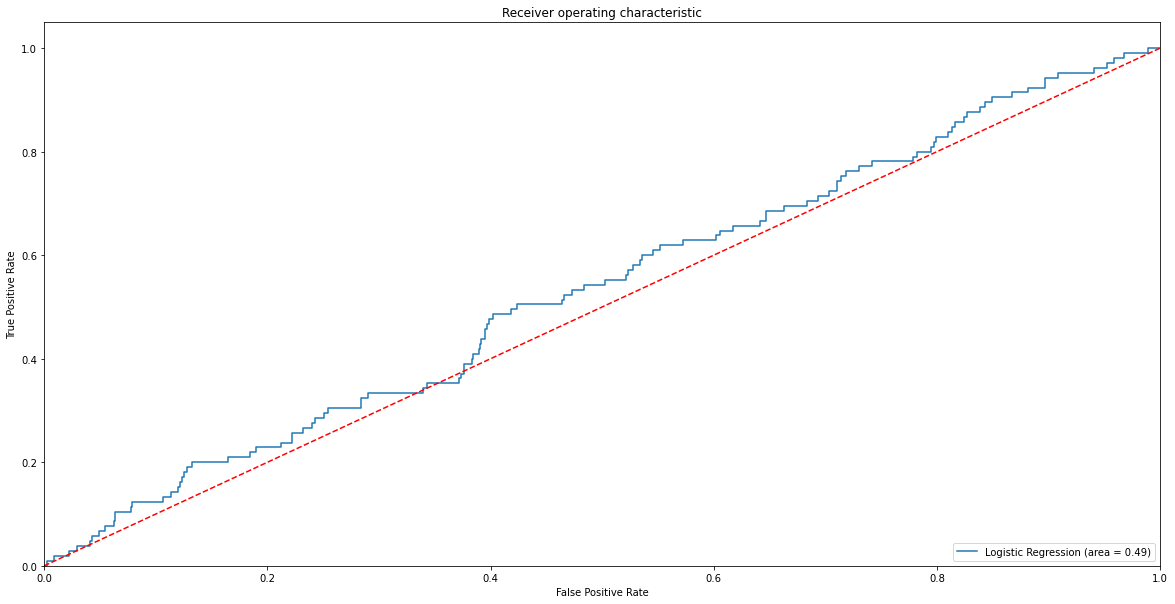

In [185]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_log_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_log_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### попробуем ДЕРЕВО - должно быть хуже из-за бинарок

In [186]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 25, random_state = 1)
tree_model.fit(X_log_train, y_train_res)

DecisionTreeClassifier(max_depth=25, random_state=1)

In [187]:
y_pred = tree_model.predict(X_log_test)

### хуже чем логрег бтв, хуже лучше я интуитивно смотрю на проценте верных 1 и не совсем ужасном проценте верных 0 - задача получить 40-50% процентов верных 1 и не ниже 60% верных 0, мой пов

In [188]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1041  213]
 [  83   22]]


In [224]:
y_test

18739    0
18300    0
599      0
27102    0
40627    0
        ..
34616    0
3369     0
463      0
7850     0
33221    0
Name: fl_fpd3, Length: 1359, dtype: int64

### построим сетку на деревьях

In [189]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score

rfc = RandomForestClassifier(n_jobs=10 , random_state = 1, bootstrap = False) 

param_grid = { 
    'n_estimators': [30,50,75,100,150,200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [ 15, 20,25,30,31,32],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, scoring = 'f1_macro')

In [190]:
CV_rfc.fit(X_log_train, y_train_res)

GridSearchCV(estimator=RandomForestClassifier(bootstrap=False, n_jobs=10,
                                              random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [15, 20, 25, 30, 31, 32],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [30, 50, 75, 100, 150, 200]},
             scoring='f1_macro')

In [191]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 32,
 'max_features': 'log2',
 'n_estimators': 150}

In [209]:
rfc1 = RandomForestClassifier(n_jobs=10 , random_state = 1, max_depth = 70, max_features = 'log2', criterion = 'gini', 
                            n_estimators = 200, bootstrap = True) 

In [210]:
rfc1.fit(X_log_train, y_train_res)

RandomForestClassifier(max_depth=70, max_features='log2', n_estimators=200,
                       n_jobs=10, random_state=1)

In [211]:
y_pred = rfc1.predict(X_log_test)

### переобучились, можно поставить ограничение на бутстрап с Тру, но вряд ли будет лучше чем логрег когда ф1_мак дает 0 попаданий на 0 классе

In [212]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1229   25]
 [  99    6]]


In [213]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1254
           1       0.19      0.06      0.09       105

    accuracy                           0.91      1359
   macro avg       0.56      0.52      0.52      1359
weighted avg       0.87      0.91      0.89      1359



### попробовал на ближайших соседях с ф бетта и матьюс кор - тоже не очень

In [214]:
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score

In [215]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_jobs = 10)
scorer = make_scorer(fbeta_score, beta = 2, average='weighted')
param_grid = { 
    'n_neighbors': [2,3,4],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'metric' :['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
    'weights': ['uniform', 'distance'],
    'p': [1,1.5,2]
}

CV_knn = GridSearchCV(estimator=knn, param_grid=param_grid, scoring = scorer)

In [216]:
CV_knn.fit(X_log_train, y_train_res)

GridSearchCV(estimator=KNeighborsClassifier(n_jobs=10),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski'],
                         'n_neighbors': [2, 3, 4], 'p': [1, 1.5, 2],
                         'weights': ['uniform', 'distance']},
             scoring=make_scorer(fbeta_score, beta=2, average=weighted))

In [217]:
CV_knn.best_params_

{'algorithm': 'auto',
 'metric': 'manhattan',
 'n_neighbors': 2,
 'p': 1,
 'weights': 'uniform'}

In [218]:
knn1 = KNeighborsClassifier(n_jobs=10 , algorithm = 'auto', metric = 'manhattan', n_neighbors = 2, p =1, weights = 'uniform') 

In [219]:
knn1.fit(X_log_train, y_train_res)

KNeighborsClassifier(metric='manhattan', n_jobs=10, n_neighbors=2, p=1)

In [220]:
y_pred = knn1.predict(X_log_test)

### результат

In [221]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1081  173]
 [  81   24]]


# Forecast part 2

In [265]:
d = {'index': y.index, 'value': y.values}
data_y = pd.DataFrame(data=d)

In [266]:
data_y

,index,value
0,0,0
1,1,0
2,2,0
3,9,0
4,10,1
...,...,...
6786,42014,0
6787,42017,0
6788,42024,0
6789,42040,0


In [267]:
X_reseted = X.reset_index()

In [268]:
merged_ytest = data_y.merge(X_reseted, on = ['index'], how = 'inner')

In [269]:
merged_ytest_drop = merged_ytest.drop(columns = [ 'inn', 'company_age', 'risk_indicator',
       'indexofduediligence', 'failurescore', 'paymentindex', 'fix_ast',
       'longterm_fnc_ivsm', 'non_crn_ast', 'rsrv', 'vat_prch_val',
       'shortterm_fnc_ivsm', 'cash_and_eqv', 'crn_ast', 'tot_ast', 'ahr_cptl',
       'addl_cptl', 'rtnd_erng', 'cptl_and_rsrv', 'longterm_brw_fnd',
       'othr_longterm_lby', 'longterm_lby', 'shortterm_brw_fnd', 'crdr_dbt',
       'shortterm_lby', 'tot_psv', 'revenue', 'othr_expn', 'pft_bfr_tax',
       'crn_incm_tax', 'def_tax_lby', 'net_profit', 'cogs', 'grs_profit',
       'cmrcl_expn', 'admn_expn', 'profit_from_sales', 'intrst_rcv',
       'intrst_pbl', 'othr_incm', 'def_tax_ast', 'rcvb', 'mrf_name_Волга',
       'mrf_name_Дальний Восток', 'mrf_name_Прочие', 'mrf_name_Северо-Запад',
       'mrf_name_Сибирь', 'mrf_name_Урал', 'mrf_name_Центр', 'mrf_name_Юг',
       'High', 'Low', 'Medium', 'No inf', 'Good spark', 'Bad spark',
       'No inf spark',
       'Торговля розничная лекарственными средствами в специализированных магазинах (аптеках)',
       'Торговля оптовая неспециализированная', 'Выращивание зерновых культур',
       'Строительство автомобильных дорог и автомагистралей',
       'Аренда и управление собственным или арендованным недвижимым имуществом',
       'Аренда и управление собственным или арендованным нежилым недвижимым имуществом',
       'Выращивание зерновых (кроме риса), зернобобовых культур и семян масличных культур',
       'Торговля оптовая фармацевтической продукцией',
       'Разработка компьютерного программного обеспечения',
       'Торговля оптовая лесоматериалами, строительными материалами и санитарно-техническим оборудованием',
       'Деятельность вспомогательная прочая, связанная с перевозками',
       'Торговля розничная прочая в неспециализированных магазинах',
       'Деятельность автомобильного грузового транспорта',
       'Торговля оптовая твердым, жидким и газообразным топливом и подобными продуктами',
       'Торговля розничная преимущественно пищевыми продуктами, включая напитки, и табачными изделиями в неспециализированных магазинах',
       'Торговля розничная легковыми автомобилями и легкими автотранспортными средствами в специализированных магазинах',
       'Разведение молочного крупного рогатого скота, производство сырого молока',
       'Деятельность ресторанов и услуги по доставке продуктов питания',
       'Производство электромонтажных работ',
       'Передача электроэнергии и технологическое присоединение к распределительным электросетям',
       'Торговля оптовая прочими машинами и оборудованием',
       'Консультирование по вопросам коммерческой деятельности и управления',
       'Торговля оптовая автомобильными деталями, узлами и принадлежностями, кроме деятельности агентов',
       'Деятельность по финансовой аренде (лизингу/сублизингу)',
       'Научные исследования и разработки в области естественных и технических наук прочие',
       'Торговля оптовая машинами, оборудованием и инструментами для сельского хозяйства',
       'Деятельность заказчика-застройщика, генерального подрядчика',
       'Торговля оптовая производственным электротехническим оборудованием, машинами, аппаратурой и материалами',
       'Выращивание однолетних культур', 'OOO', 'НАО', 'ПАО', 'Privat',
       'Zabugorie', 'Zabugorie+Privat'])

In [270]:
merged_ytest_drop['value_pred'] = y_pred

In [272]:
tot_tot = merged_ytest_drop.sort_values(by=['date_begin'])

In [276]:
fpd_model = tot_tot.groupby(by=["date_begin"]).mean().value_pred

In [280]:
fpd_model.values

array([0.10909091, 0.07949791, 0.09125475, 0.0720339 , 0.04583333,
       0.04132231, 0.0562249 , 0.0952381 , 0.08294931, 0.04651163,
       0.04744526, 0.09186352, 0.10344828, 0.06008584, 0.1350211 ,
       0.10067114, 0.10191083, 0.06481481, 0.084     , 0.0893617 ,
       0.07009346, 0.09090909, 0.06280193, 0.08450704, 0.0625    ,
       0.06842105, 0.06      , 0.072     , 0.08290155])

In [278]:
spd_forecast  = pd.read_excel(
    'spd_others_forecast.xlsx')

In [281]:
spd_forecast['fpd3_model'] = fpd_model.values

In [321]:
spd_forecast.loc[29] = ['2021-06-01', 0, 0.07832]
spd_forecast.loc[29] = ['2021-07-01', 0, 0.0722]

In [322]:
spd_forecast[['fpd3']][:29].diff().fillna(0).values

array([[ 0.00000000e+00],
       [-2.34771160e-03],
       [ 9.43429451e-03],
       [-1.29315805e-02],
       [-1.01152327e-02],
       [-1.65656932e-03],
       [ 2.23134340e-03],
       [-3.19346225e-03],
       [-2.12870053e-03],
       [ 8.39959812e-03],
       [ 1.58232991e-03],
       [ 7.36832641e-03],
       [ 1.75008862e-02],
       [ 5.04833152e-02],
       [-3.83479792e-02],
       [-4.71079272e-02],
       [ 3.42988333e-02],
       [-3.58799128e-02],
       [ 1.89392987e-02],
       [-1.49519033e-02],
       [-7.53952305e-03],
       [ 1.40040438e-02],
       [ 3.89237697e-03],
       [ 1.02296254e-02],
       [-2.79115125e-02],
       [-1.11000552e-03],
       [ 1.01156671e-02],
       [ 4.48228393e-05],
       [ 1.31611777e-02]])

In [338]:
spd_forecast['diff'] = spd_forecast['fpd3_model'] -spd_forecast['fpd3']

In [342]:
spd_forecast['diff'].mean()

0.016391316479500952

In [346]:
spd_forecast['fdp3_model'] = spd_forecast['fpd3_model'] - 0.015

In [348]:
spd_forecast

,date,fpd3,fpd3_model,diff,fdp3_model
0,2019-01-01 00:00:00,0.0699634,0.109091,0.0391275,0.0940909
1,2019-02-01 00:00:00,0.0676157,0.0794979,0.0118822,0.0644979
2,2019-03-01 00:00:00,0.07705,0.0912548,0.0142048,0.0762548
3,2019-04-01 00:00:00,0.0641184,0.0720339,0.00791553,0.0570339
4,2019-05-01 00:00:00,0.0540031,0.0458333,-0.00816981,0.0308333
5,2019-06-01 00:00:00,0.0523466,0.0413223,-0.0110243,0.0263223
6,2019-07-01 00:00:00,0.0545779,0.0562249,0.00164699,0.0412249
7,2019-08-01 00:00:00,0.0513845,0.0952381,0.0438536,0.0802381
8,2019-09-01 00:00:00,0.0492558,0.0829493,0.0336936,0.0679493
9,2019-10-01 00:00:00,0.0576553,0.0465116,-0.0111437,0.0315116


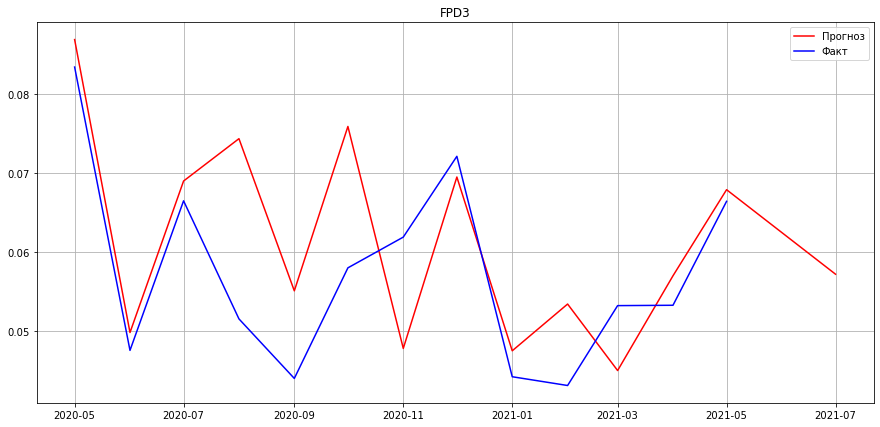

In [350]:
plt.figure(figsize=(15, 7))
plt.plot(spd_forecast.date[16:], spd_forecast[['fdp3_model']][16:], "r", label="Прогноз")
plt.plot(spd_forecast.date[16:29], spd_forecast[['fpd3']][16:29],  'b', label="Факт")
plt.legend(loc="best")
plt.title("FPD3")
plt.grid(True)

In [222]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89      1254
           1       0.12      0.23      0.16       105

    accuracy                           0.81      1359
   macro avg       0.53      0.55      0.53      1359
weighted avg       0.87      0.81      0.84      1359



# Forecast

In [253]:
X_dummy_all = X[['mrf_name_Волга',
       'mrf_name_Дальний Восток', 'mrf_name_Прочие', 'mrf_name_Северо-Запад',
       'mrf_name_Сибирь', 'mrf_name_Урал', 'mrf_name_Центр', 'mrf_name_Юг',
       'High', 'Low', 'Medium', 'No inf', 'Good spark', 'Bad spark',
       'No inf spark',
       'Торговля розничная лекарственными средствами в специализированных магазинах (аптеках)',
       'Торговля оптовая неспециализированная', 'Выращивание зерновых культур',
       'Строительство автомобильных дорог и автомагистралей',
       'Аренда и управление собственным или арендованным недвижимым имуществом',
       'Аренда и управление собственным или арендованным нежилым недвижимым имуществом',
       'Выращивание зерновых (кроме риса), зернобобовых культур и семян масличных культур',
       'Торговля оптовая фармацевтической продукцией',
       'Разработка компьютерного программного обеспечения',
       'Торговля оптовая лесоматериалами, строительными материалами и санитарно-техническим оборудованием',
       'Деятельность вспомогательная прочая, связанная с перевозками',
       'Торговля розничная прочая в неспециализированных магазинах',
       'Деятельность автомобильного грузового транспорта',
       'Торговля оптовая твердым, жидким и газообразным топливом и подобными продуктами',
       'Торговля розничная преимущественно пищевыми продуктами, включая напитки, и табачными изделиями в неспециализированных магазинах',
       'Торговля розничная легковыми автомобилями и легкими автотранспортными средствами в специализированных магазинах',
       'Разведение молочного крупного рогатого скота, производство сырого молока',
       'Деятельность ресторанов и услуги по доставке продуктов питания',
       'Производство электромонтажных работ',
       'Передача электроэнергии и технологическое присоединение к распределительным электросетям',
       'Торговля оптовая прочими машинами и оборудованием',
       'Консультирование по вопросам коммерческой деятельности и управления',
       'Торговля оптовая автомобильными деталями, узлами и принадлежностями, кроме деятельности агентов',
       'Деятельность по финансовой аренде (лизингу/сублизингу)',
       'Научные исследования и разработки в области естественных и технических наук прочие',
       'Торговля оптовая машинами, оборудованием и инструментами для сельского хозяйства',
       'Деятельность заказчика-застройщика, генерального подрядчика',
       'Торговля оптовая производственным электротехническим оборудованием, машинами, аппаратурой и материалами',
       'Выращивание однолетних культур', 'OOO', 'НАО', 'ПАО', 'Privat',
       'Zabugorie', 'Zabugorie+Privat']]

In [254]:
X_non_dummy_all  = X[['company_age', 'risk_indicator', 'indexofduediligence', 'failurescore',
       'paymentindex', 'fix_ast', 'longterm_fnc_ivsm', 'non_crn_ast', 'rsrv',
       'vat_prch_val', 'shortterm_fnc_ivsm', 'cash_and_eqv', 'crn_ast',
       'tot_ast', 'ahr_cptl', 'addl_cptl', 'rtnd_erng', 'cptl_and_rsrv',
       'longterm_brw_fnd', 'othr_longterm_lby', 'longterm_lby',
       'shortterm_brw_fnd', 'crdr_dbt', 'shortterm_lby', 'tot_psv', 'revenue',
       'othr_expn', 'pft_bfr_tax', 'crn_incm_tax', 'def_tax_lby', 'net_profit',
       'cogs', 'grs_profit', 'cmrcl_expn', 'admn_expn', 'profit_from_sales',
       'intrst_rcv', 'intrst_pbl', 'othr_incm', 'def_tax_ast', 'rcvb']]

In [255]:
X_std_all = stdsc.transform(X_non_dummy_all)

In [256]:
Norm_all = pd.DataFrame(X_std_all, columns = X_non_dummy_all.columns)
Norm_all = Norm_all.set_index(X.index)
Norm_dummy_all = pd.concat([Norm_all, X_dummy_all], axis = 1)

In [258]:
y_pred = knn1.predict(Norm_dummy_all)

In [263]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y, y_pred)
print(confusion_matrix)

[[6135  173]
 [ 134  349]]


In [264]:
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

### SVC на метрике жаккарда

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = SVC(random_state = 42)

param_grid = { 
    'C': [3, 5, 10, 15, 25],
    'kernel': ['sigmoid', 'poly'], #'linear', 'rbf'
    'gamma' :['scale', 'auto'],
    'coef0': [1, 2,3,5]
}

CV_svm = GridSearchCV(estimator=svm, param_grid=param_grid, scoring = 'jaccard')


In [ ]:
CV_svm.fit(X_log_train, y_train_res)

In [ ]:
CV_svm.best_params_

In [ ]:
svm1 = SVC(random_state = 42 , C = 25, coef0 = 3, gamma = 'scale', kernel = 'poly')

In [ ]:
svm1.fit(X_log_train, y_train_res)

In [ ]:
y_pred = svm1.predict(X_log_test)

### Результат

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

In [ ]:
from mlxtend.plotting import plot_decision_regions

In [ ]:
svm1.fit(X_log_train[[ 'vat_prch_val','failurescore']], y_train_res)

### тут график отрисовки для значимости регрессоров в плане классификации, советую использовать до 4 с индикаторами неиспользуемых в построении - отпраляйте в филлеры, вмемто классификатора одна из моделей, тут я брал свм1, которая выше

In [ ]:
value = 1.5
width = 0.75
plot_decision_regions(X_log_train[['vat_prch_val','failurescore']].values[0:150], y_train_res.values[0:150], svm1, feature_index=[0,1],
              #filler_feature_values={2: value, 3:value
                                     #,  4:value, 
                                    #5: value, 6:value, 7: value, 8:value,
                                    #9: value, 10:value, 11: value, 12:value,
                                    #13: value, 14:value, 15: value, 16:value,
                                    #17: value, 18:value, 19: value, 20:value,
                                    #21: value, 22:value, 23: value, 24:value,
                                    #25: value, 26:value, 27: value, 28:value,
                                    #29: value, 30:value, 31: value},  
             # filler_feature_ranges={2: width, 3:width
                                     #,  4:width, 
                                    #5: width, 6:width, 7: width, 8:width,
                                    #9: width, 10:width, 11: width, 12:width,
                                    #13: width, 14: width, 15: width, 16:width,
                                    #17: width, 18:width, 19: width, 20:width,
                                    #21: width, 22:width, 23: width, 24:width,
                                    #25: width, 26:width, 27: width, 28: width,
                                    #29: width, 30: width, 31: width},
                      zoom_factor = 10)   
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, tree_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, tree_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import matthews_corrcoef

yyy_true = np.array([])
yyy_pred = np.array([])
precision_recall_fscore_support(y_test, y_pred, average='macro')

In [ ]:
print(pd.__version__)

In [ ]:
import matplotlib

In [ ]:
print(matplotlib.__version__)